In [6]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from xmitgcm import open_mdsdataset

In [19]:
spec_febTS = xr.open_dataset('curtain_SSH_spectra_febTS.nc')
spec_dnw = xr.open_dataset('curtain_SSH_spectra_downwelling.nc')
spec_2xTau = xr.open_dataset('curtain_SSH_spectra_2xTau.nc')

X = spec_febTS.X

In [20]:
sns.set_context('talk')

Text(0, 0.5, 'Phase (unwrapped)')

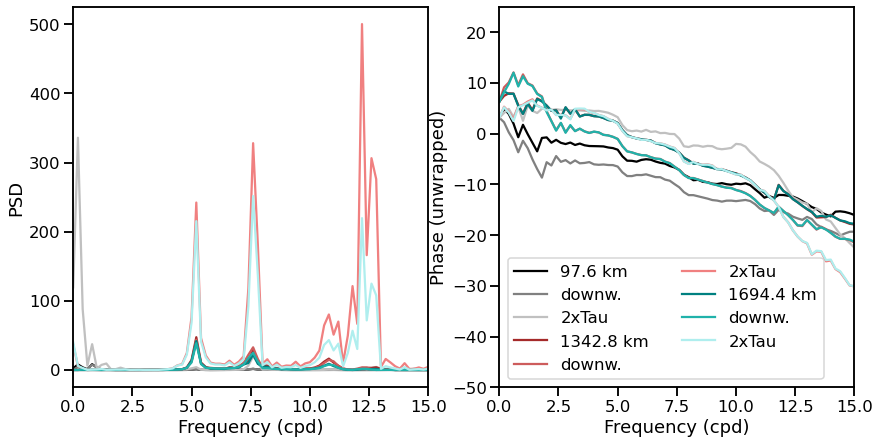

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,7), sharex=True)

colors1=['black','brown','teal']
colors2=['gray','indianred','lightseagreen']
colors3=['silver','lightcoral','paleturquoise']

for kk, col1,col2,col3 in zip([45, 430, 480],colors1, colors2, colors3):
    ax1.plot(spec_febTS.Freq, spec_febTS.psd_data[kk,:],color=col1, label='%1.1f km' %X[kk])
    ax2.plot(spec_febTS.Freq, np.unwrap(spec_febTS.phase_data[kk,:]),
             color=col1, label='%1.1f km' %X[kk])
    
    ax1.plot(spec_baro.Freq, spec_dnw.psd_data[kk,:],'-',color=col2, label='downw.')
    ax2.plot(spec_baro.Freq, np.unwrap(spec_dnw.phase_data[kk,:]),'-',
             color=col2, label='downw.')
    
    ax1.plot(spec_2xTau.Freq, spec_2xTau.psd_data[kk,:],'-',color=col3,label='2xTau')
    ax2.plot(spec_2xTau.Freq, np.unwrap(spec_2xTau.phase_data[kk,:]),'-',
             color=col3, label='2xTau')
    
ax2.legend(ncol=2)
ax1.set_xlim(0,15)
ax2.set_ylim(-50,25)
ax1.set_xlabel('Frequency (cpd)')
ax2.set_xlabel('Frequency (cpd)')
ax1.set_ylabel('PSD')
ax2.set_ylabel('Phase (unwrapped)')


### Time series comparison

In [32]:
ssh_febTS = xr.open_dataset('curtain_SSH_SVB_febTS.nc')
ssh_febTS_noSVB = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')

ssh_2xTau = xr.open_dataset('curtain_SSH_SVB_2xTau.nc')
ssh_2xTau_noSVB = xr.open_dataset('curtain_SSH_NoSVB_2xTau.nc')

ssh_down = xr.open_dataset('curtain_SSH_SVB_downwelling.nc')
ssh_down_noSVB = xr.open_dataset('curtain_SSH_NoSVB_downwelling.nc')

Text(0, 0.5, 'SSH')

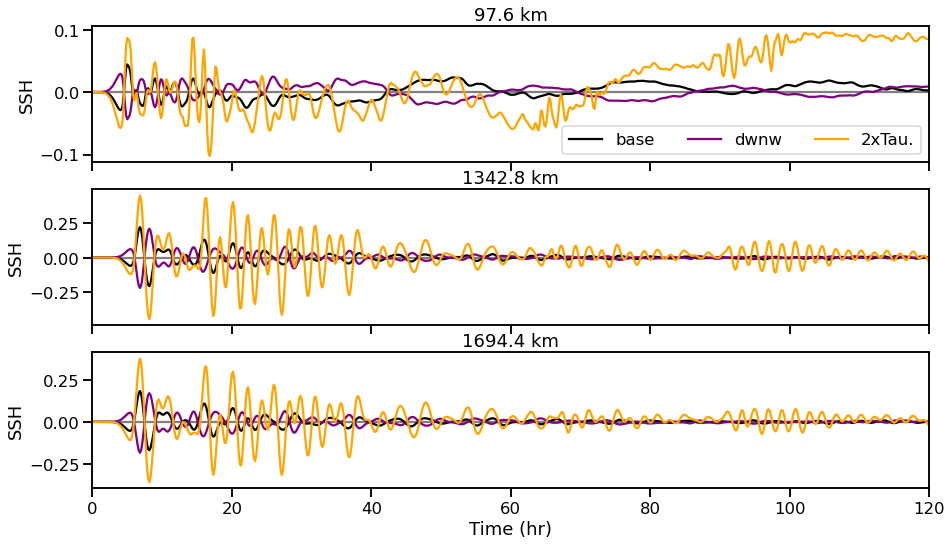

In [63]:
sns.set_context('talk')
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,8.5), sharex=True)

colors1=['black','black','black']
colors2=['orange','orange','orange']
colors3=['purple','purple','purple']

base = ssh_febTS.curtain_data[:]-ssh_febTS_noSVB.curtain_data[:]
twoxTau = ssh_2xTau.curtain_data[:]-ssh_2xTau_noSVB.curtain_data[:]
down = ssh_down.curtain_data[:]-ssh_down_noSVB.curtain_data[:]

ax1.axhline(0, color='0.5')
ax2.axhline(0, color='0.5')
ax3.axhline(0, color='0.5')

for kk, col1,col2,col3, ax in zip([45, 430, 480],colors1, colors2, colors3, [ax1,ax2,ax3]):
    ax.plot(ssh_febTS.T/3600, base[:,kk]*100,color=col1,label='base' )
    ax.plot(ssh_down.T/3600, down[:,kk]*100,'-',color=col3,label='dwnw')
    ax.plot(ssh_2xTau.T/3600, twoxTau[:,kk]*100,'-',color=col2, label='2xTau.')

    ax.set_title('%1.1f km' %X[kk])

ax1.legend(ncol=3)
ax1.set_xlim(0,24*5)
ax3.set_xlabel('Time (hr)')
ax1.set_ylabel('SSH')
ax2.set_ylabel('SSH')
ax3.set_ylabel('SSH')


Text(0, 0.5, 'SSH')

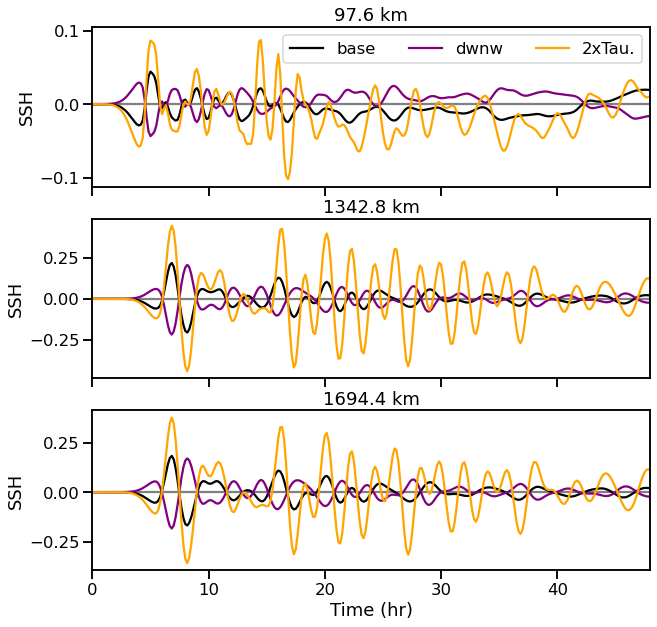

In [61]:
sns.set_context('talk')
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,10), sharex=True)

colors1=['black','black','black']
colors2=['orange','orange','orange']
colors3=['purple','purple','purple']

base = ssh_febTS.curtain_data[:]-ssh_febTS_noSVB.curtain_data[:]
twoxTau = ssh_2xTau.curtain_data[:]-ssh_2xTau_noSVB.curtain_data[:]
down = ssh_down.curtain_data[:]-ssh_down_noSVB.curtain_data[:]

ax1.axhline(0, color='0.5')
ax2.axhline(0, color='0.5')
ax3.axhline(0, color='0.5')

for kk, col1,col2,col3, ax in zip([45, 430, 480],colors1, colors2, colors3, [ax1,ax2,ax3]):
    ax.plot(ssh_febTS.T/3600, base[:,kk]*100,color=col1,label='base' )
    ax.plot(ssh_down.T/3600, down[:,kk]*100,'-',color=col3,label='dwnw')
    ax.plot(ssh_2xTau.T/3600, twoxTau[:,kk]*100,'-',color=col2, label='2xTau.')

    ax.set_title('%1.1f km' %X[kk])

ax1.legend(ncol=3, )
ax1.set_xlim(0,24*2)
ax3.set_xlabel('Time (hr)')
ax1.set_ylabel('SSH')
ax2.set_ylabel('SSH')
ax3.set_ylabel('SSH')
